### Task 1: Load data files

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df_soc = pd.read_csv('chicago-sociodemographics.csv')
df_covid = pd.read_csv('covid-cases-tests-deaths.csv')
gdf = gpd.read_file('boundaries-zipcode.geojson')

#### First, we will look at the sociodemographic data

In [3]:
df_soc.head() # display the first 5 rows

,zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Some College(%),Bachelor's(%),Post-grad(%),Foriegn Born Population(%),Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%)
0,60647,85658,32.2,17.56,75.14,7.30,49.75,50.25,48.50,4.72,...,15.28,35.73,21.65,17.10,14.76,14.11,1.67,0.68,66.31,2.47
1,60639,88515,34.6,26.29,62.24,11.47,49.90,50.10,8.07,13.24,...,24.16,9.32,4.24,32.87,4.69,2.99,0.61,0.00,91.67,0.03
2,60707,42434,40.0,21.06,63.60,15.33,47.33,52.67,46.85,6.63,...,30.45,16.73,11.11,26.15,42.45,11.93,0.98,0.00,44.29,0.34
3,60622,52957,32.2,13.41,79.84,6.75,50.64,49.36,64.44,5.35,...,12.86,44.90,26.79,13.30,38.17,19.04,1.60,0.50,38.03,2.65
4,60651,63679,33.9,26.37,61.38,12.25,46.37,53.63,5.00,53.02,...,30.47,8.03,5.19,13.92,1.55,2.46,0.89,0.00,94.89,0.21


In [4]:
df_soc.columns # check all column names

Index(['zipcode', 'Population', 'Median age', 'Under 18(%)', '18 to 64(%)',
       '65 and over(%)', 'Male(%)', 'Female(%)', 'White(%)', 'Black(%)',
       'Native(%)', 'Asian(%)', 'Islander(%)', 'Two plus(%)', 'Hispanic(%)',
       'Per capita income (USD)', 'Median household income (USD)',
       'Below poverty line(%)', 'Mean travel time to work (Minutes)',
       'Drove Alone (%)', 'Carpooled (%)', 'Public Transit (%)', 'Bicycle (%)',
       'Walked (%)', 'Other (%)', 'Worked at home (%)', 'Number of households',
       'Persons per household', 'Married (%)', 'Single (%)',
       'Number of housing units', 'Occupied housing (%)', 'Vacant housing (%)',
       'Owner Occupied (%)', 'Renter Occupied (%)', 'Median housing value',
       'Moved Since Prev Year(%)', 'Same House Prev Year(%)', 'No Degree(%)',
       'High School(%)', 'Some College(%)', 'Bachelor's(%)', 'Post-grad(%)',
       'Foriegn Born Population(%)', 'Europe(%)', 'Asia(%)', 'Africa(%)',
       'Oceania(%)', 'Latin Ame

In [5]:
df_soc.describe() # summary statistics

,zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Some College(%),Bachelor's(%),Post-grad(%),Foriegn Born Population(%),Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%)
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,...,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,60634.140351,48110.543860,35.684211,18.653333,68.522456,12.824386,48.267018,51.732982,37.565965,29.265614,...,22.509649,24.728596,20.328947,19.101754,18.401228,27.405439,7.423158,0.630526,43.701404,2.437895
std,32.795055,25151.054703,3.344494,7.701047,9.650553,4.168513,2.912633,2.912633,26.904405,33.302000,...,9.963416,13.285896,15.926900,11.793351,15.699829,20.795805,9.999222,2.367412,29.921277,5.349512
min,60601.000000,729.000000,30.400000,0.690000,57.140000,0.250000,39.510000,44.290000,1.000000,0.620000,...,3.720000,6.660000,2.490000,1.550000,0.390000,0.000000,0.000000,0.000000,4.310000,0.000000
25%,60615.000000,30039.000000,33.300000,13.030000,61.270000,10.190000,46.280000,49.970000,8.070000,3.700000,...,14.660000,12.690000,6.810000,11.120000,4.350000,10.170000,0.980000,0.000000,15.400000,0.140000
50%,60630.000000,46621.000000,34.700000,21.060000,63.600000,12.680000,48.520000,51.480000,45.250000,13.240000,...,22.730000,23.370000,16.130000,17.650000,14.990000,19.880000,2.660000,0.060000,35.310000,0.900000
75%,60645.000000,68761.000000,38.300000,25.390000,75.140000,15.510000,50.030000,53.720000,58.350000,53.020000,...,30.630000,35.010000,26.790000,29.340000,26.680000,42.480000,9.910000,0.540000,68.330000,2.640000
max,60827.000000,107930.000000,42.700000,30.290000,92.540000,20.730000,55.710000,60.490000,80.750000,95.090000,...,43.560000,49.080000,68.090000,44.500000,62.120000,79.440000,39.290000,17.540000,98.320000,35.290000


In [6]:
df_soc['Asia(%)'].describe() # summary statistics for a specific column

count    57.000000
mean     27.405439
std      20.795805
min       0.000000
25%      10.170000
50%      19.880000
75%      42.480000
max      79.440000
Name: Asia(%), dtype: float64

In [4]:
# Filtering data: example 1
# find the zipcode with the highest percentage of foreign born population
df_soc[df_soc['Foreign Born Population(%)'] == df_soc['Foreign Born Population(%)'].max()] 

,zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Some College(%),Bachelor's(%),Post-grad(%),Foreign Born Population(%),Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%)
46,60659,43843,34.8,27.18,61.54,11.28,49.98,50.02,38.56,8.2,...,22.13,24.66,13.27,44.5,14.14,60.56,6.75,0.54,17.32,0.7


In [8]:
# Filtering data: example 2
# find zipcodes with median housing value less than or equal to the mean and population less than or equal to 30000
# only display zipcode, median housing value, and population
df_soc[(df_soc['Median housing value'] <= df_soc['Median housing value'].mean()) & (df_soc['Population'] <= 30000)][['zipcode', 'Median housing value', 'Population']] 

,zipcode,Median housing value,Population
10,60621,106300,26736
25,60633,139500,12720
29,60656,304500,28982
31,60655,262100,27771
43,60827,94300,28327


#### Now let's look at the covid data

In [55]:
df_covid.head()

,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
0,60602,35,08/29/2021,09/04/2021,2.0,123.0,161.0,9887.5,92.0,3970,...,319131.8,0.0,0.0,0,2,0.0,160.8,1244,60602-2021-35,POINT (-87.628309 41.883136)
1,60604,24,06/07/2020,06/13/2020,1.0,22.0,128.0,2813.3,9.0,134,...,17135.5,0.1,0.2,0,0,0.0,0.0,782,60604-2020-24,POINT (-87.629029 41.878153)
2,60604,25,06/14/2020,06/20/2020,0.0,22.0,0.0,2813.3,16.0,150,...,19181.6,0.0,0.2,0,0,0.0,0.0,782,60604-2020-25,POINT (-87.629029 41.878153)
3,60604,26,06/21/2020,06/27/2020,1.0,23.0,128.0,2941.2,23.0,173,...,22122.8,0.0,0.2,0,0,0.0,0.0,782,60604-2020-26,POINT (-87.629029 41.878153)
4,60604,27,06/28/2020,07/04/2020,0.0,23.0,0.0,2941.2,19.0,192,...,24552.4,0.1,0.1,0,0,0.0,0.0,782,60604-2020-27,POINT (-87.629029 41.878153)


In [10]:
df_covid.columns

Index(['ZIP Code', 'Week Number', 'Week Start', 'Week End', 'Cases - Weekly',
       'Cases - Cumulative', 'Case Rate - Weekly', 'Case Rate - Cumulative',
       'Tests - Weekly', 'Tests - Cumulative', 'Test Rate - Weekly',
       'Test Rate - Cumulative', 'Percent Tested Positive - Weekly',
       'Percent Tested Positive - Cumulative', 'Deaths - Weekly',
       'Deaths - Cumulative', 'Death Rate - Weekly', 'Death Rate - Cumulative',
       'Population', 'Row ID', 'ZIP Code Location'],
      dtype='object')

### Task 2: Data cleaning

#### Renaming columns

In [15]:
gdf = gdf.rename(columns={"zip": "zipcode"}) # rename the column name to match the other dataframe
gdf['zipcode'] = gdf['zipcode'].astype(str).astype(int) # convert zipcode from string to integer
zipcodes = gdf['zipcode'].unique().tolist() # get a list of all zipcodes

In [12]:
gdf.head() # display the first 5 rows

,objectid,shape_area,shape_len,zipcode,geometry
0,33,106052287.488,42720.0444058,60647,"MULTIPOLYGON (((-87.67762 41.91776, -87.67761 ..."
1,34,127476050.762,48103.7827213,60639,"MULTIPOLYGON (((-87.72683 41.92265, -87.72693 ..."
2,35,45069038.4783,27288.6096123,60707,"MULTIPOLYGON (((-87.78500 41.90915, -87.78531 ..."
3,36,70853834.3797,42527.9896789,60622,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
4,37,99039621.2518,47970.1401531,60651,"MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ..."


<Axes: >

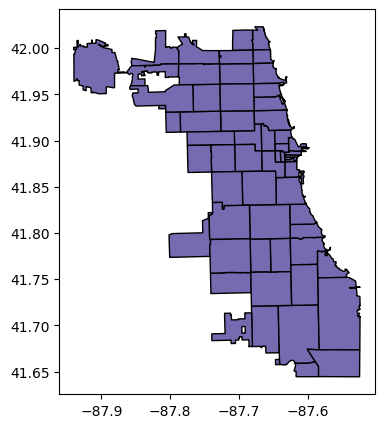

In [63]:
gdf.plot(figsize=(5,5), color='#756bb1', edgecolor='black')
# plt.savefig('vis-1.png', transparent=True)

#### Cleaning the data

In [59]:
df_covid = df_covid.fillna(0) # fill all missing values with 0
df_covid['Week Start'] = pd.to_datetime(df_covid['Week Start']).dt.date # convert date to datetime object
df_covid['Week End'] = pd.to_datetime(df_covid['Week End']).dt.date # convert date to datetime object
df_covid = df_covid[df_covid['ZIP Code'] != 'Unknown'] # remove rows with unknown zipcode
df_covid['ZIP Code'] = df_covid['ZIP Code'].astype(int) # convert zipcode from string to integer

df_covid = df_covid[df_covid['ZIP Code'].isin(zipcodes)] # remove rows with zipcode not in the list of zipcodes in the geojson file
df_covid = df_covid.sort_values(by='Week End') # sort by date
df_covid = df_covid.rename(columns={'Week End': 'date', 'Cases - Weekly': 'cases', 'Deaths - Weekly': 'deaths', 'ZIP Code': 'zipcode'}) # rename columns
df_covid['cases'] = df_covid['cases'].astype(int) # convert cases to integer
df_covid['deaths'] = df_covid['deaths'].astype(int) # convert deaths to integer

### Task 3: Creating visualizations

#### **Visualization 1:** Number of cases and deaths over time

In [95]:
df_agg_by_date = df_covid[['date','cases', 'deaths']] # select columns
df_agg_by_date = df_agg_by_date.groupby('date').sum() # aggregate by date
df_agg_by_date = df_agg_by_date.reset_index() # reset index

df_agg_by_date.head() # display the first 5 rows

,date,cases,deaths
0,2020-03-07,0,0
1,2020-03-14,64,0
2,2020-03-21,821,7
3,2020-03-28,2229,26
4,2020-04-04,2893,133


In [87]:
df_agg_by_date = df_covid[['date','cases', 'deaths']]
df_agg_by_date = df_agg_by_date.set_index('date')
# df_agg_by_date.groupby(pd.Grouper(level=0, freq='7D')).sum()

C:\Users\fmiranda\AppData\Local\Temp\ipykernel_16964\2493314087.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


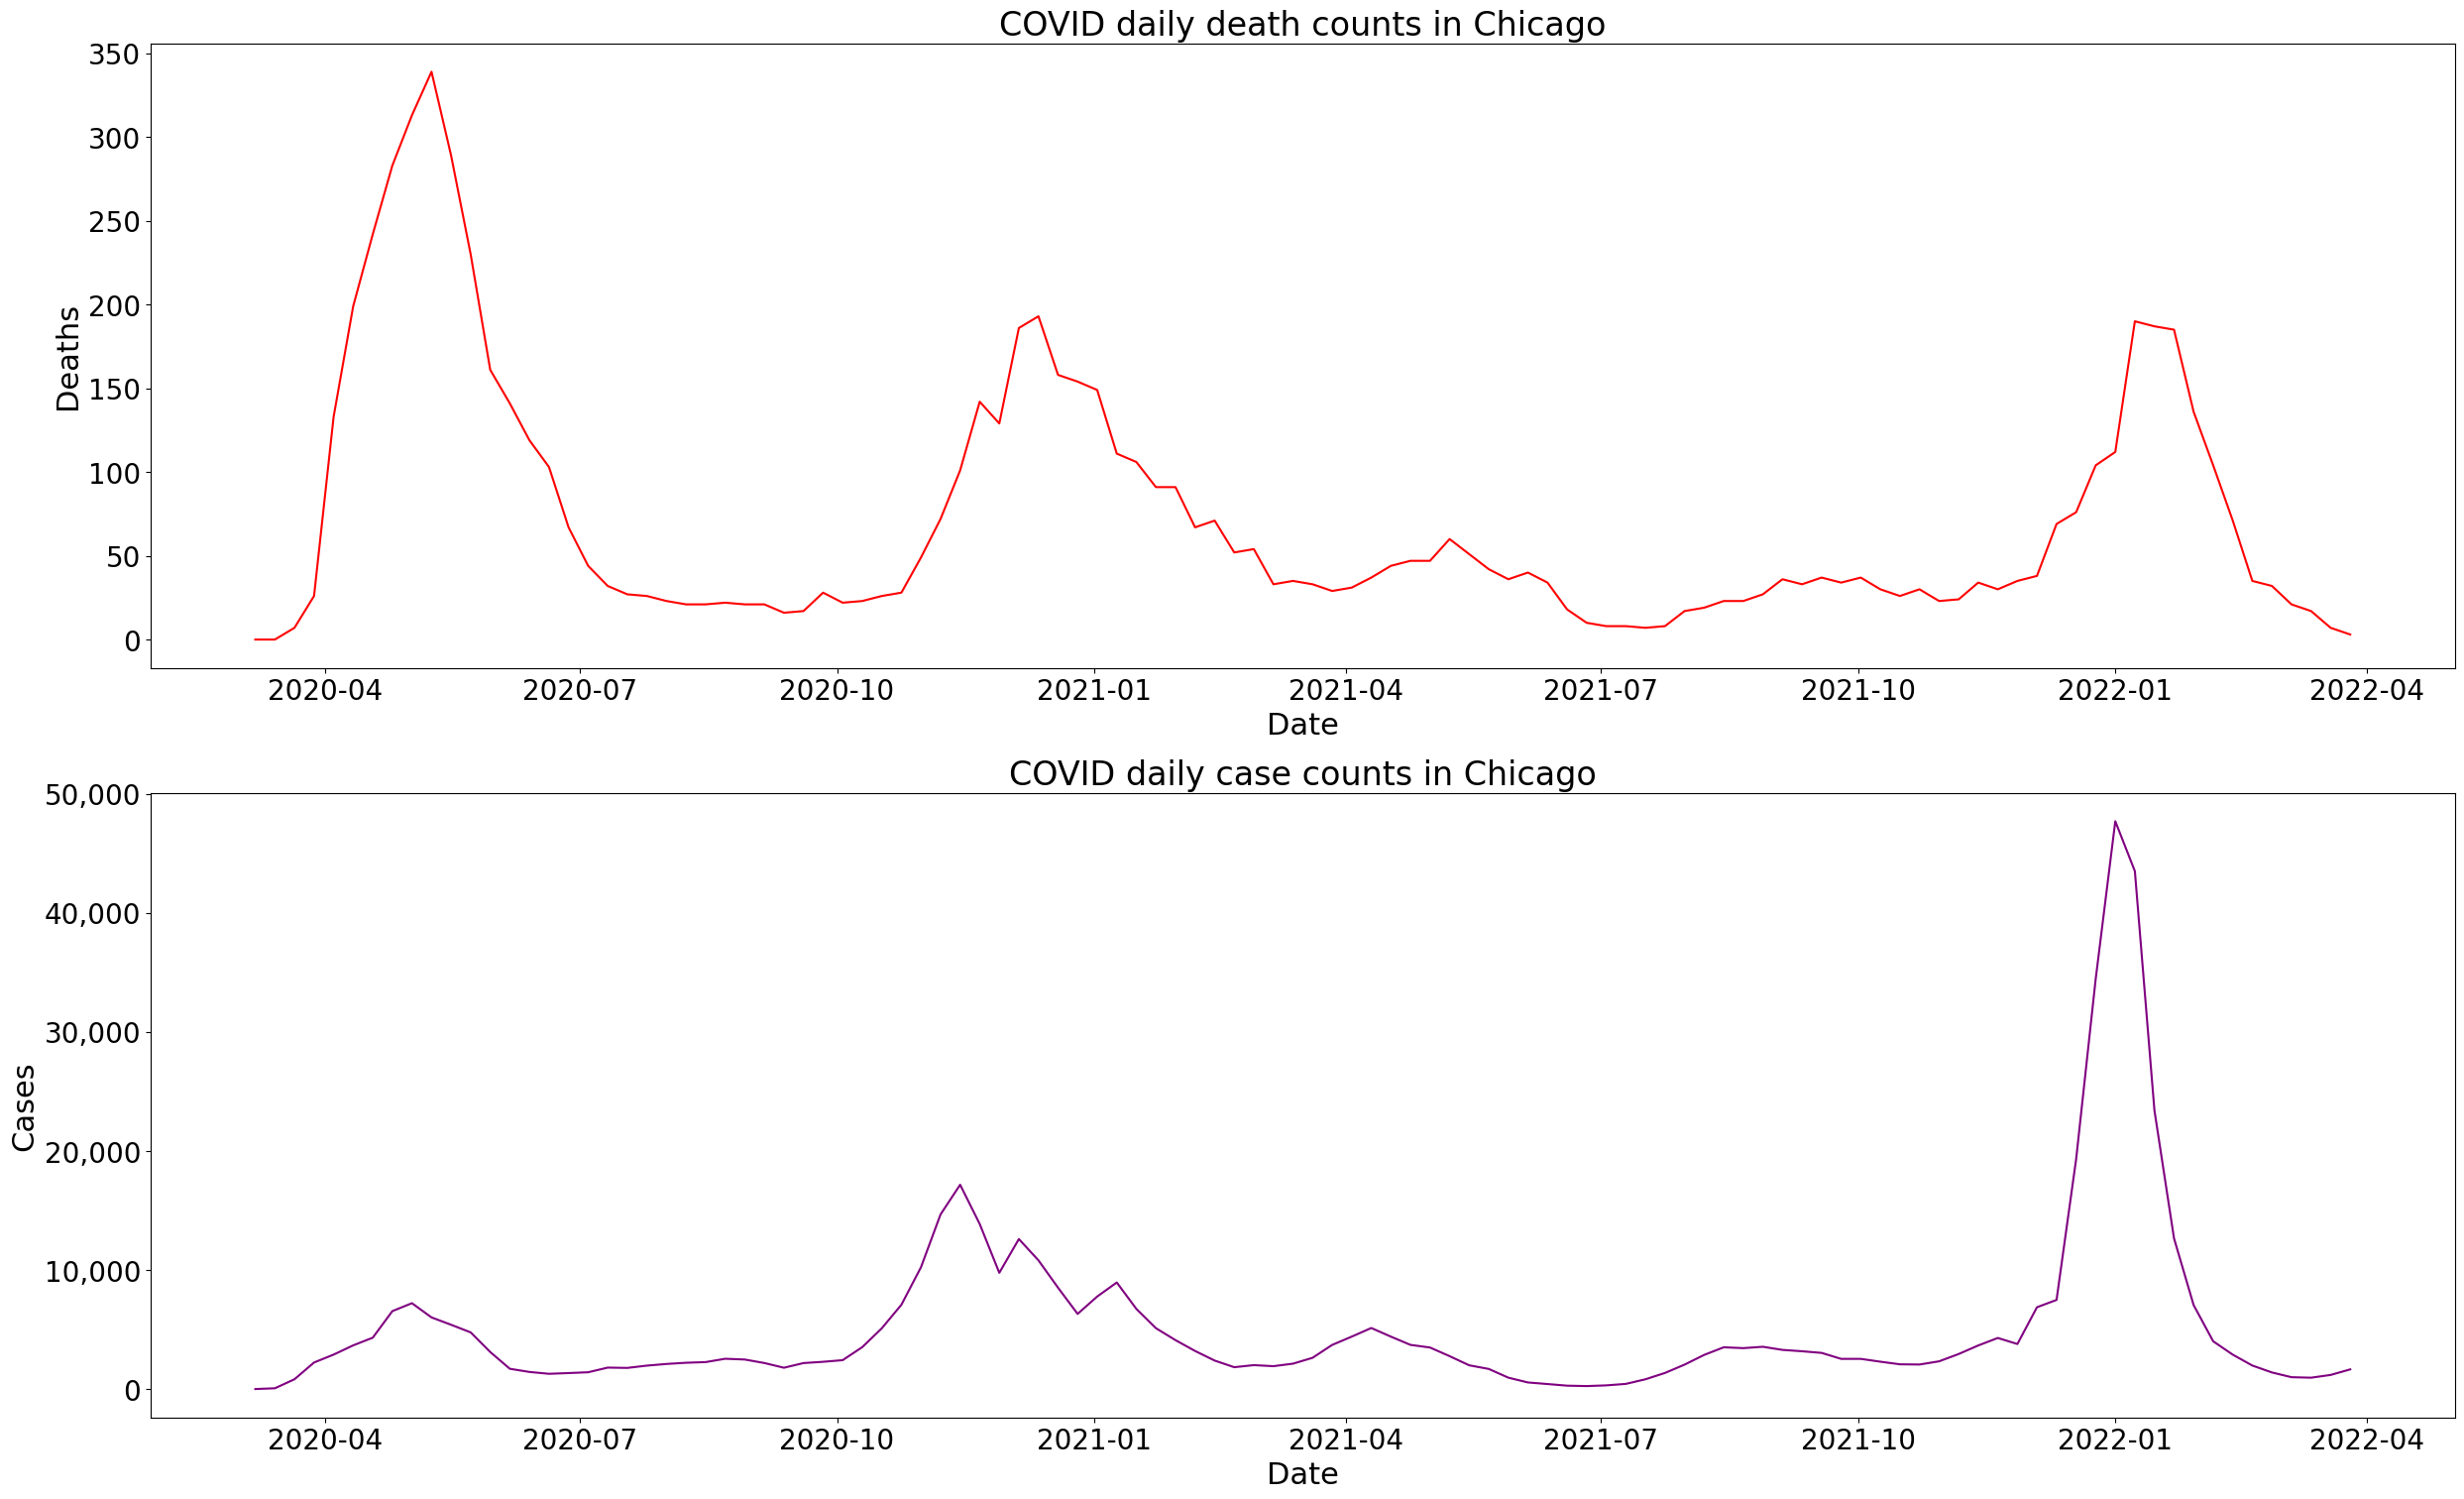

In [65]:
fig, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(30,18)) # create a figure with 2 subplots

ax1.plot(df_agg_by_date['date'], df_agg_by_date['deaths'], color='Red')
# set figure properties
ax1.set_xlabel("Date")
ax1.set_ylabel("Deaths")
ax1.set_title("COVID daily death counts in Chicago")
ax1.title.set_size(24)
ax1.xaxis.label.set_size(22)
ax1.yaxis.label.set_size(22)
ax1.tick_params(axis='both', which='major', labelsize=20)

ax2.plot(df_agg_by_date['date'], df_agg_by_date['cases'], color='Purple')
# set figure properties
ax2.set_xlabel("Date")
ax2.set_ylabel("Cases")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
ax2.set_title("COVID daily case counts in Chicago")
ax2.title.set_size(24)
ax2.xaxis.label.set_size(22)
ax2.yaxis.label.set_size(22)
ax2.tick_params(axis='both', which='major', labelsize=20)

plt.savefig('vis-2.png', transparent=True)

**Interesting findings:** Omicron variant hit really hard in Chicago. In the beginning of 2022, number of cases nearly rose to 50,000 per day which was far more than the initial Covid outbreak

#### **Visulization 2:** Number of cases and deaths over space

In [30]:
# cases and deaths aggregated by zipcode
df_agg_by_zip = df_covid[['cases', 'deaths', 'zipcode']]
df_agg_by_zip = df_agg_by_zip.groupby(['zipcode']).sum()
df_agg_by_zip = df_agg_by_zip.reset_index()

# merge with socio-demographic data
df_agg_by_zip = df_agg_by_zip.merge(df_soc, how='inner', on='zipcode')

# normalize cases and deaths by population
df_agg_by_zip['cases_per_1000'] = (df_agg_by_zip['cases'] / df_agg_by_zip['Population'] * 1000).round(0).astype(int)
df_agg_by_zip['deaths_per_1000'] = (df_agg_by_zip['deaths'] / df_agg_by_zip['Population'] * 1000).round(0).astype(int)

df_agg_by_zip.head()

,zipcode,cases,deaths,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),...,Post-grad(%),Foriegn Born Population(%),Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%),cases_per_1000,deaths_per_1000
0,60601,4155,13,14513,34.2,5.68,76.37,17.95,45.61,54.39,...,46.95,37.35,25.54,58.15,1.07,0.70,11.59,2.95,286,1
1,60602,330,3,1596,34.0,7.21,92.54,0.25,53.38,46.62,...,54.73,26.44,3.08,45.02,0.00,17.54,14.93,19.43,207,2
2,60603,262,0,1186,33.3,1.26,82.04,16.69,52.78,47.22,...,50.85,29.34,28.74,64.94,0.00,0.00,4.31,2.01,221,0
3,60604,334,0,729,32.3,0.69,90.40,8.92,39.51,60.49,...,68.09,20.99,9.80,49.67,0.00,0.00,5.23,35.29,458,0
4,60605,4930,15,30950,34.1,8.43,81.38,10.19,47.24,52.76,...,44.36,20.01,14.53,61.84,5.33,0.24,11.88,6.17,159,0


Merge aggregation by zipcode with geodataframe

In [31]:
gdf_merged = pd.merge(df_agg_by_zip, gdf, how='inner', on='zipcode')
gdf_merged = gpd.GeoDataFrame(gdf_merged, crs="EPSG:4326", geometry='geometry')

Function to annotate map with zipcodes and remove overlaps

Visualization

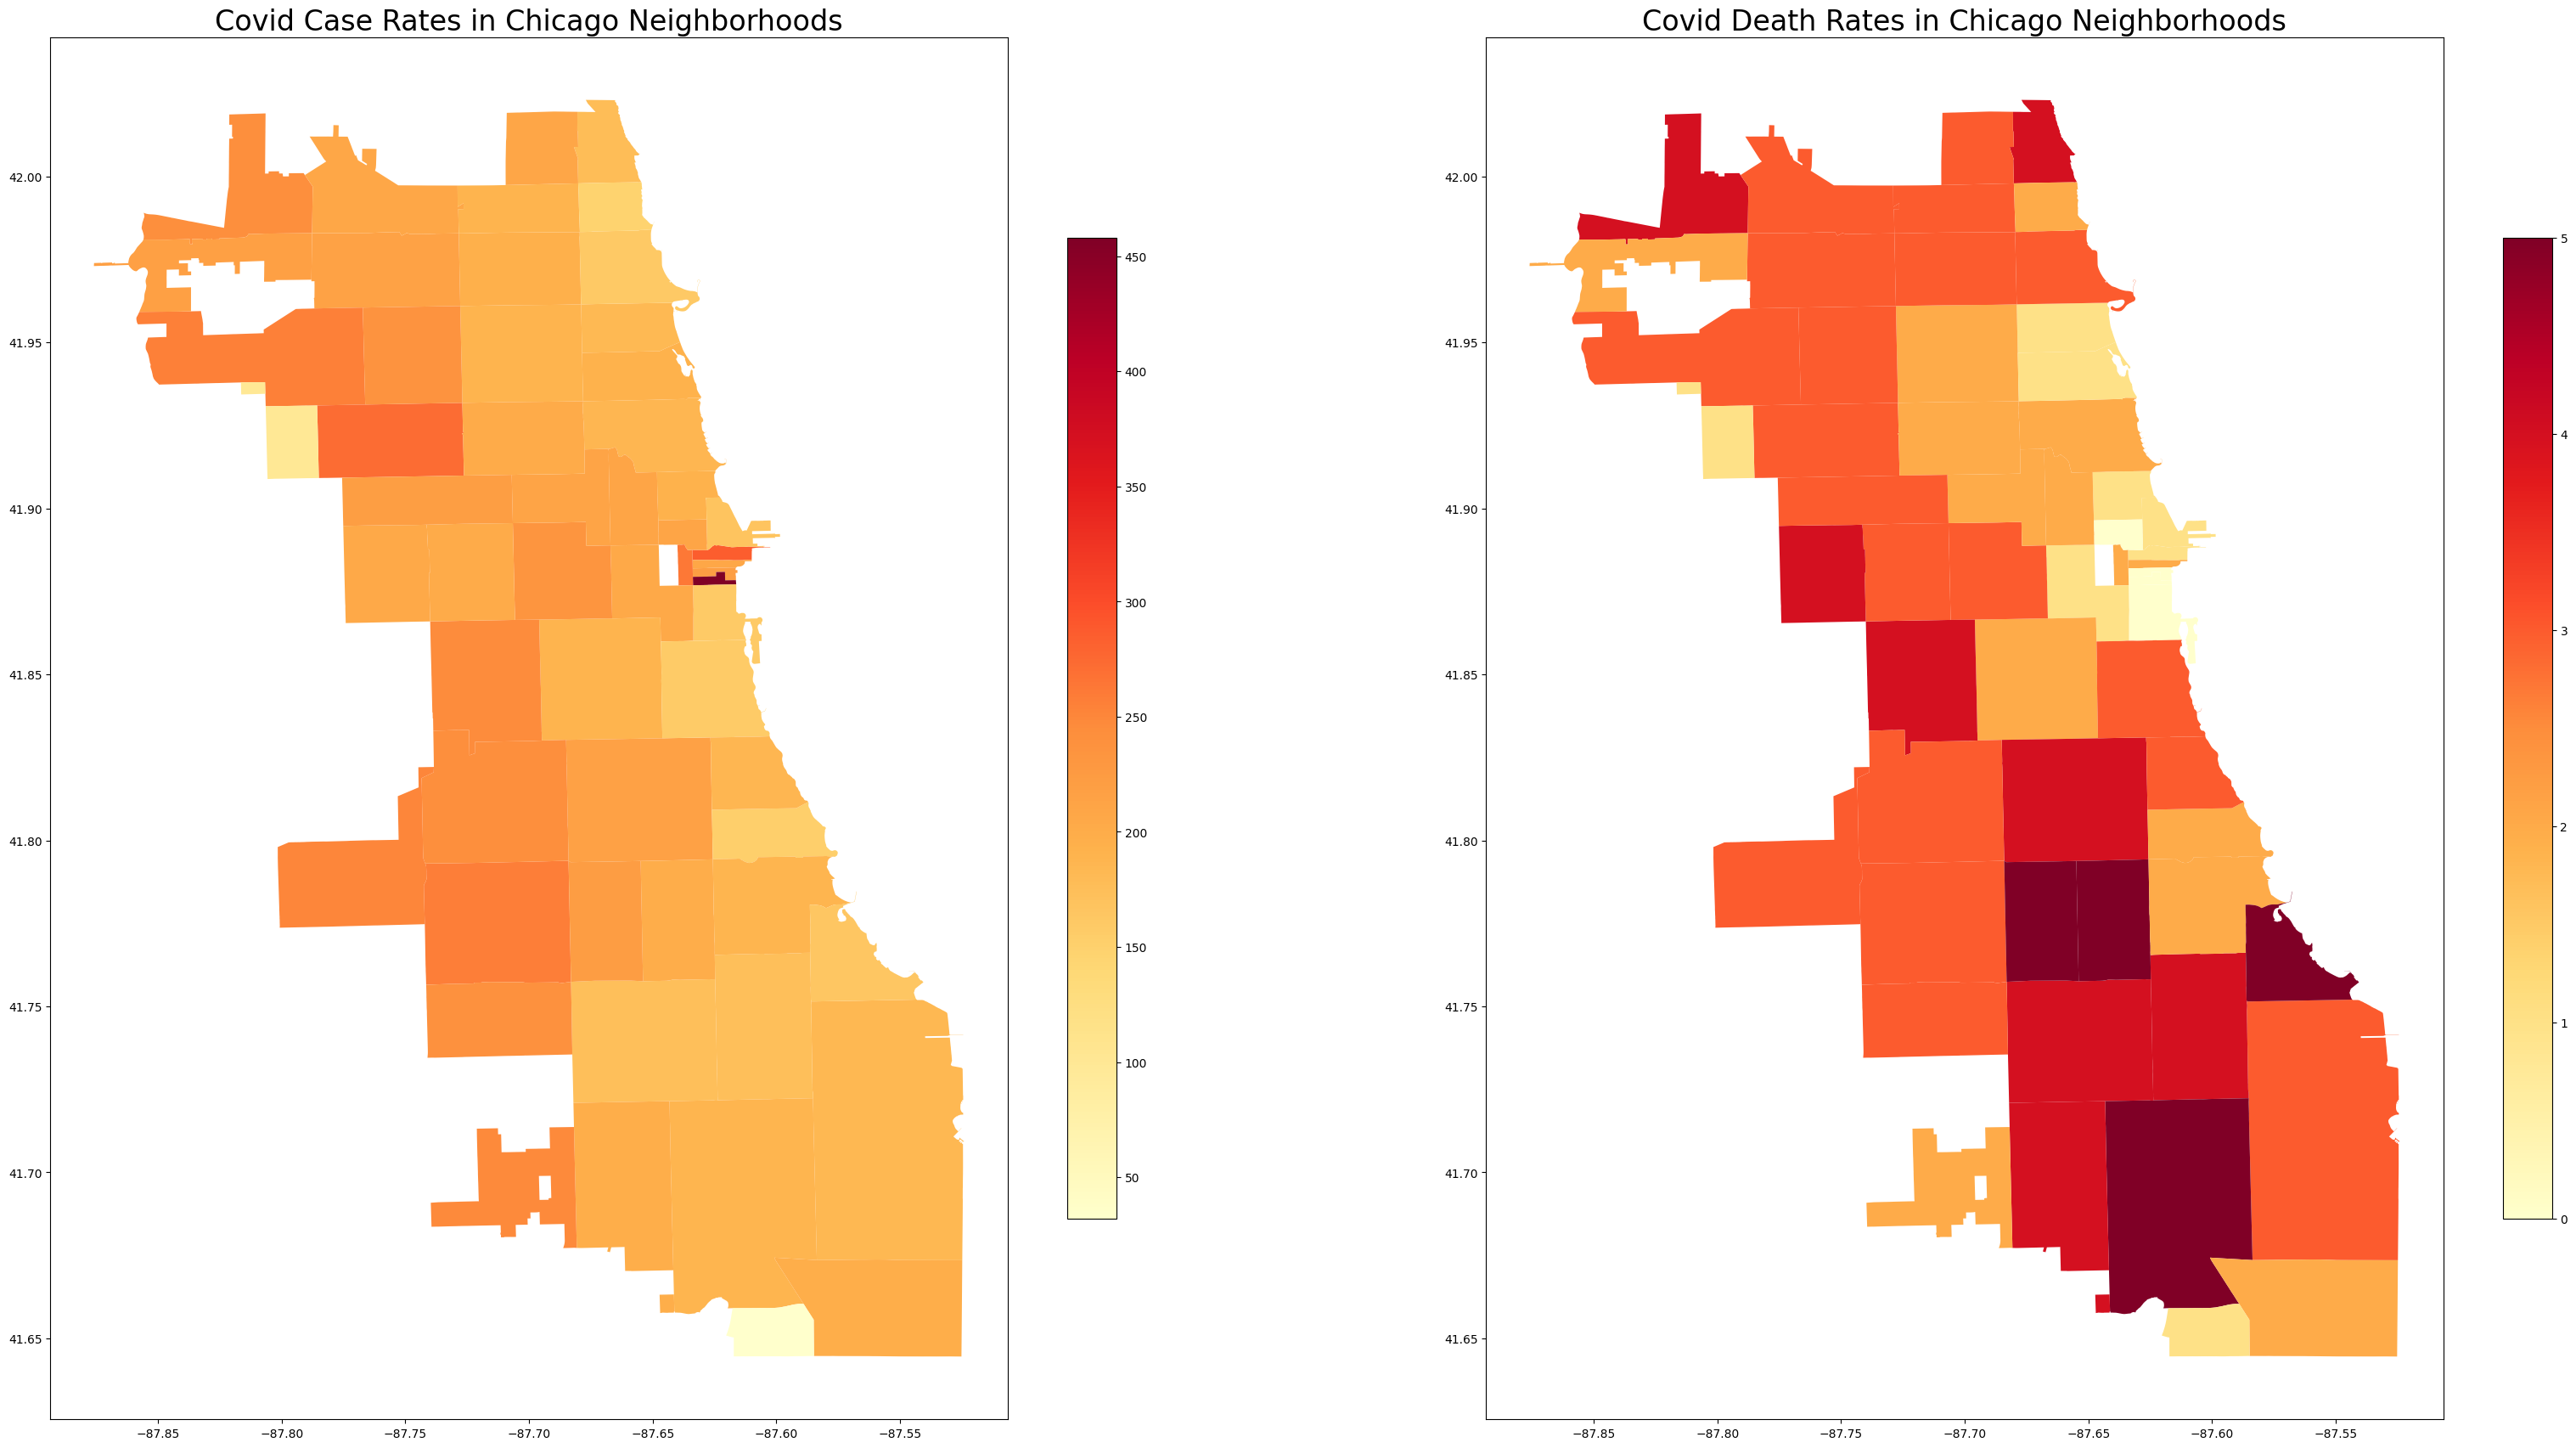

In [67]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(40,50))

ax1.set_title('Covid Case Rates in Chicago Neighborhoods', fontsize=24)
gdf_merged.plot(column = 'cases_per_1000', ax=ax1, cmap='YlOrRd', legend=True, legend_kwds={'shrink': 0.3})

ax2.set_title('Covid Death Rates in Chicago Neighborhoods', fontsize=24)
gdf_merged.plot(column = 'deaths_per_1000', ax=ax2, cmap='YlOrRd', legend=True, legend_kwds={'shrink': 0.3})

plt.savefig('vis-3.png', transparent=True)

**Interesting findings:** Here, we find out that the neighborhood with zipcode 60604 had the most number of covid cases per 1,000 population. Furthermore we find that, it's a very small neighboorhood with a population of 749 whereas it had 334 covid cases over the course of last two years. Neighborhoods with zipcode 60707 and 60827 had the least number of covid cases. In case of death rates, the neighborhoods most affected are of zipcodes 60621, 60628, 60636 and 60649.

One other interesting observation was that, with respect to Covid death rates Chicago south side is more affected than the north.

In [48]:
df_agg_by_zip[df_agg_by_zip['cases_per_1000'] == df_agg_by_zip['cases_per_1000'].max()]

,zipcode,cases,deaths,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),...,Post-grad(%),Foriegn Born Population(%),Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%),cases_per_1000,deaths_per_1000
3,60604,334,0,729,32.3,0.69,90.4,8.92,39.51,60.49,...,68.09,20.99,9.8,49.67,0.0,0.0,5.23,35.29,458,0


In [49]:
df_agg_by_zip[df_agg_by_zip['deaths_per_1000'] == df_agg_by_zip['deaths_per_1000'].max()]

,zipcode,cases,deaths,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),...,Post-grad(%),Foriegn Born Population(%),Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%),cases_per_1000,deaths_per_1000
20,60621,5330,144,26736,36.6,26.77,57.73,15.50,45.44,54.56,...,2.55,3.10,4.34,12.30,25.57,0.0,56.45,1.33,199,5
26,60628,12140,305,65008,39.4,21.44,61.27,17.29,45.87,54.13,...,8.75,2.79,4.35,5.51,17.52,0.0,72.40,0.22,187,5
33,60636,6678,162,30039,40.5,22.67,57.14,20.20,45.50,54.50,...,2.88,5.45,0.86,0.00,1.10,0.0,98.04,0.00,222,5
45,60649,7789,216,47084,38.1,21.32,63.17,15.51,44.63,55.37,...,11.35,4.26,8.82,7.83,38.24,0.0,44.02,1.10,165,5


### **Visualization 3:** Correlation between sociodemographic factors and Covid death cases at the zipcode level

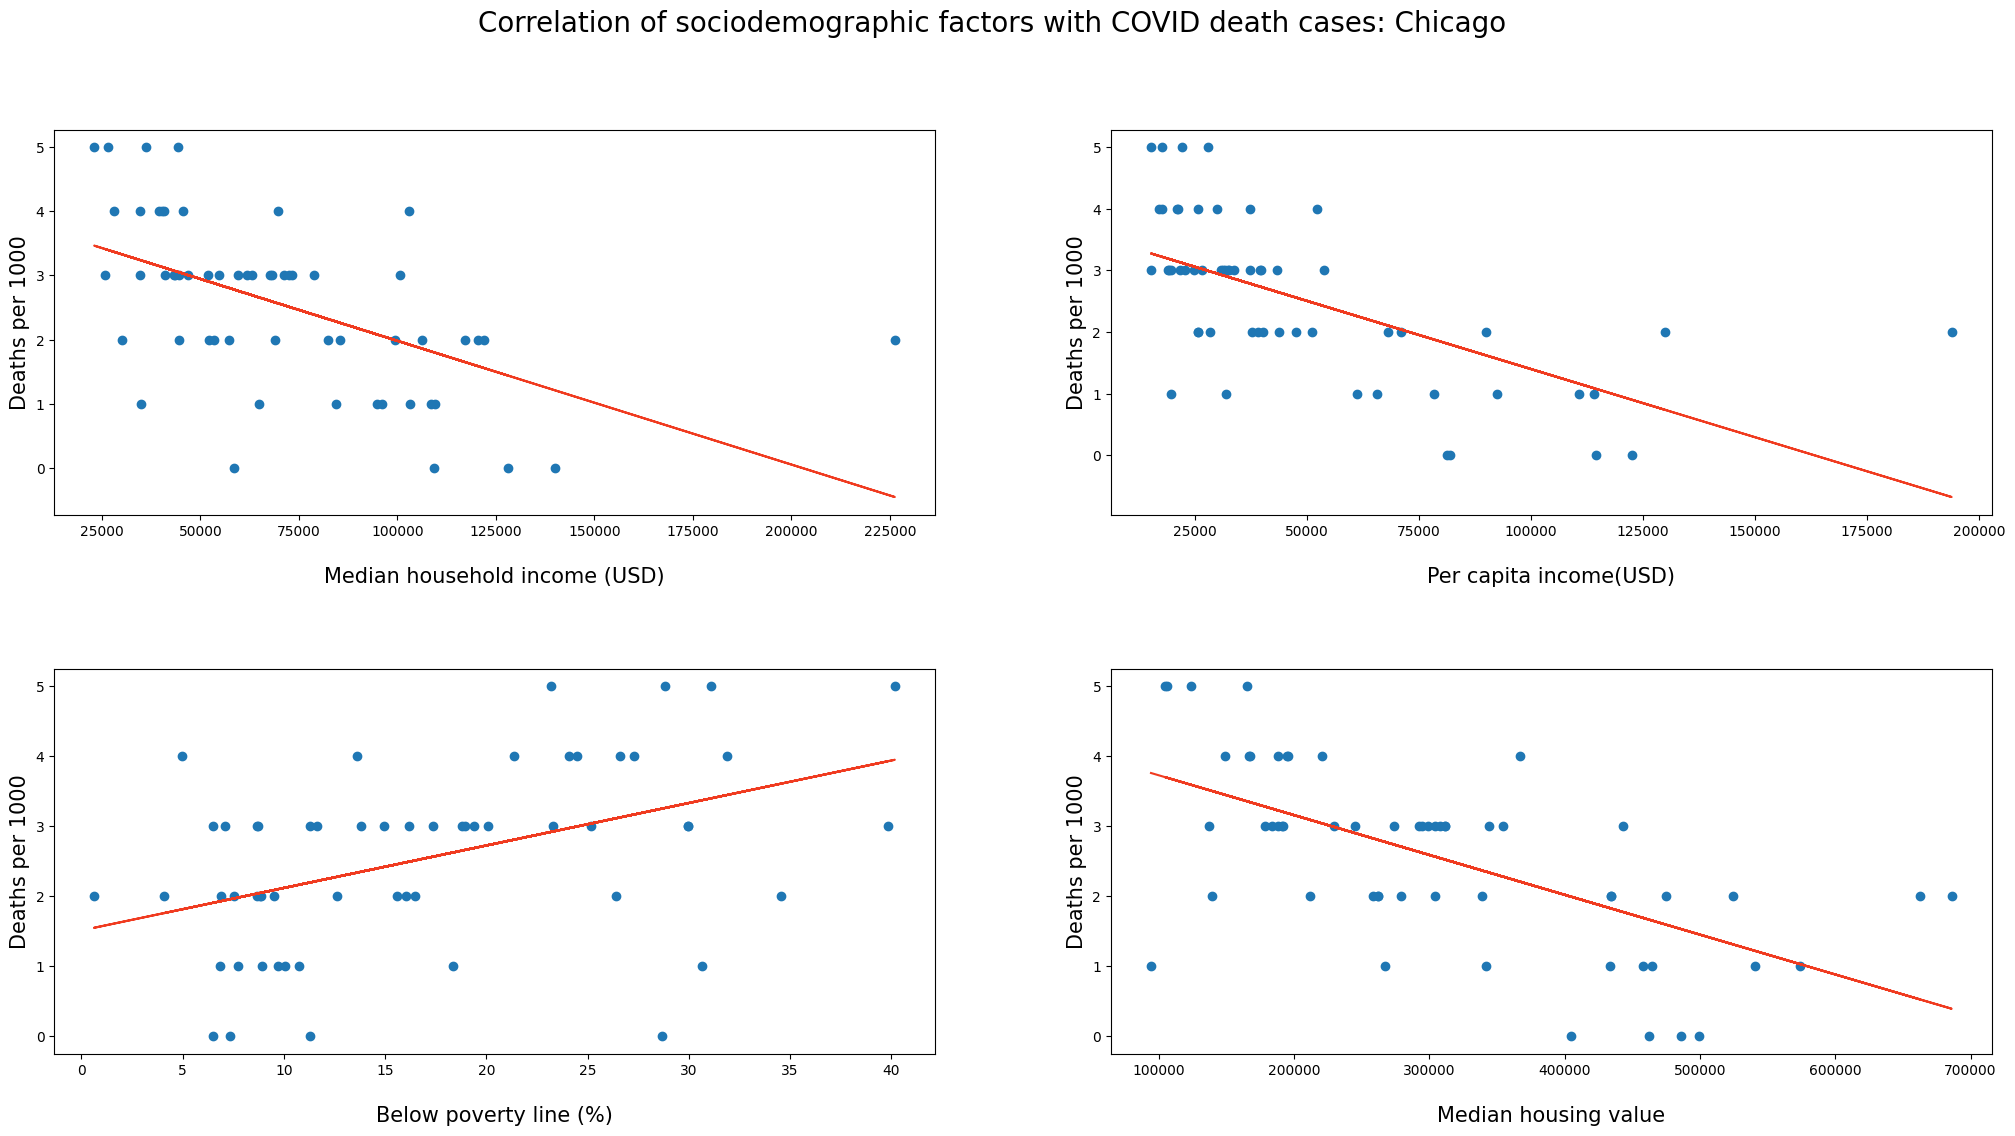

In [96]:
def get_regression_line(x, y):
    m, b = np.polyfit(x, y, 1)
    return m, b

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(25,12))
fig.suptitle('Correlation of sociodemographic factors with COVID death cases: '+ 'Chicago',fontsize=20)

ax1.scatter(df_agg_by_zip['Median household income (USD)'], df_agg_by_zip['deaths_per_1000'])
x, y = df_agg_by_zip['Median household income (USD)'], df_agg_by_zip['deaths_per_1000']
m, b = get_regression_line(x, y)
ax1.plot(x, m*x + b, color='#f03b20')
ax1.set_xlabel('\nMedian household income (USD)',fontsize=15)
ax1.set_ylabel('Deaths per 1000',fontsize=15)

ax2.scatter(df_agg_by_zip['Per capita income (USD)'], df_agg_by_zip['deaths_per_1000'])
x, y = df_agg_by_zip['Per capita income (USD)'], df_agg_by_zip['deaths_per_1000']
m, b = get_regression_line(x, y)
ax2.plot(x, m*x + b, color='#f03b20')
ax2.set_xlabel('\nPer capita income(USD)',fontsize=15)
ax2.set_ylabel('Deaths per 1000',fontsize=15)

ax3.scatter(df_agg_by_zip['Below poverty line(%)'], df_agg_by_zip['deaths_per_1000'])
x, y = df_agg_by_zip['Below poverty line(%)'], df_agg_by_zip['deaths_per_1000']
m, b = get_regression_line(x, y)
ax3.plot(x, m*x + b, color='#f03b20')
ax3.set_xlabel('\nBelow poverty line (%)',fontsize=15)
ax3.set_ylabel('Deaths per 1000',fontsize=15)

ax4.scatter(df_agg_by_zip['Median housing value'], df_agg_by_zip['deaths_per_1000'])
x, y = df_agg_by_zip['Median housing value'], df_agg_by_zip['deaths_per_1000']
m, b = get_regression_line(x, y)
ax4.plot(x, m*x + b, color='#f03b20')
ax4.set_xlabel('\nMedian housing value',fontsize=15)
ax4.set_ylabel('Deaths per 1000',fontsize=15)

fig.subplots_adjust(hspace=0.4)
plt.savefig('vis-4.png', transparent=True)

**Interesting findings:**  There is some correlation with economic standing of a neighboorhood and the impact of Covid 19.